# Predictive Modeling of Customer Bookings

This project aims to predict whether a customer will complete a flight booking based on historical booking data from British Airways. Using machine learning models, we analyze customer behavior, booking trends, and key factors that influence booking completion.

The insights from this model can help optimize marketing strategies, improve customer targeting, and increase booking conversions.

## 1. Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [85]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

## 2. Data Understanding (Initial Exploration)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [8]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

## 3. Exploratory Data Analysis (EDA)

In [86]:
# Do the EDA without making any changes to orignal datset
eda = df.copy()

In [13]:
eda

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


### **1. Check the percentage of booking completed**

In [12]:
# What is the count and the ratio of customer who have not booked and booked the ticket
eda['booking_complete'].value_counts(normalize=True) * 100

booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64

The dataset is highly imbalanced, meaning most customers did not book a ticket.So, before creating model need to handle the imbalance data using oversampling/undersampling.

Alternatively, I'll use the Precision-Recall and AUC-ROC over accuracy.

### **2. Analyze the preferred sales channel**

In [13]:
# Find out which channel (Internet, Mobile) is mostly used (sales_channel)
preferred_sales = eda[eda['booking_complete'] == 1]['sales_channel'].value_counts(normalize=True) * 100
preferred_sales

sales_channel
Internet    91.856111
Mobile       8.143889
Name: proportion, dtype: float64

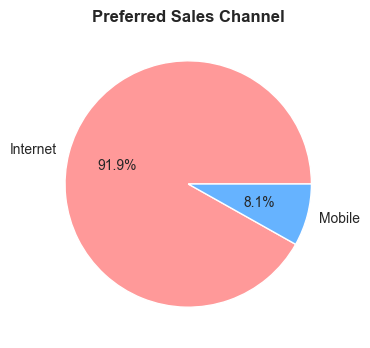

In [14]:
sns.set_style("darkgrid")
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(4,4))
plt.pie(preferred_sales, labels=preferred_sales.index, autopct='%1.1f%%', colors=colors)

plt.title("Preferred Sales Channel", fontweight="bold")
plt.show()

91% of time the user has preferred to book ticket using Internet.

### **3. Analyze the trip type preference**

In [15]:
# Check the distribution of trip_type (One-way, Round-trip, CircleTrip)
eda[eda['booking_complete'] == 1]['trip_type'].value_counts()

trip_type
RoundTrip     7453
OneWay          20
CircleTrip       5
Name: count, dtype: int64

Almost people preferred "Round Trip", which mean people are intresting to take the same flight at the time of return.

### **4. Analyze days before flying when tickets were booked**

In [16]:
# Check when people book their tickets.
# First create a bin size of the available days to get concise result
bins = [0, 8, 31, 91, 181, 625]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

eda['planner'] = pd.cut(eda['purchase_lead'], bins=bins, labels=labels,
       include_lowest=True)

In [17]:
travel_planning_time_span = (eda[eda['booking_complete'] == 1]['planner'].value_counts(normalize=True).sort_index(ascending=True) * 100).reset_index()
travel_planning_time_span

,planner,proportion
0,0-7,12.613697
1,8-30,26.003210
2,31-90,32.530765
3,91-180,15.235420
4,181-624,13.616907


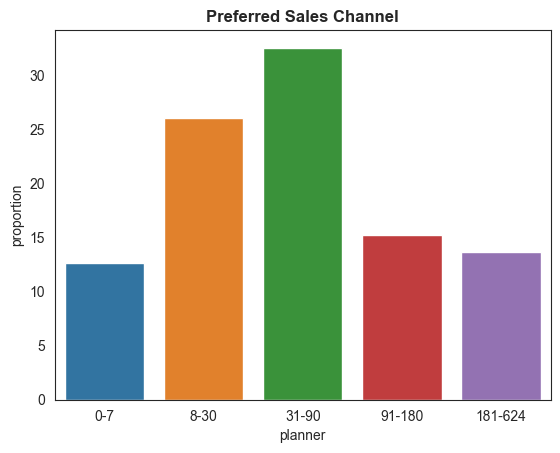

In [18]:
sns.set_style("white")
sns.barplot(travel_planning_time_span, x='planner', y='proportion', hue='planner')
plt.title("Preferred Sales Channel", fontweight="bold")
plt.show()

In [19]:
travel_planning_time_span.iloc[0:3].groupby('planner', observed=True)['proportion'].head(3).sum()

71.14767255216694

Most people prefer to book between 31-90 days before flying. When we combine time span from from 0 days to 90 we can see 71% of ticket booked during this 90 day period.

### **5. Analyze the length of stay**

In [20]:
# Understand how long users stay at their destination (length_of_stay)
eda['length_of_stay'].max()

778

As we checked max value of length stay, which is 778 that's a very big number. To get into more let's draw the histogram to she the frequency, and the shape of the data 

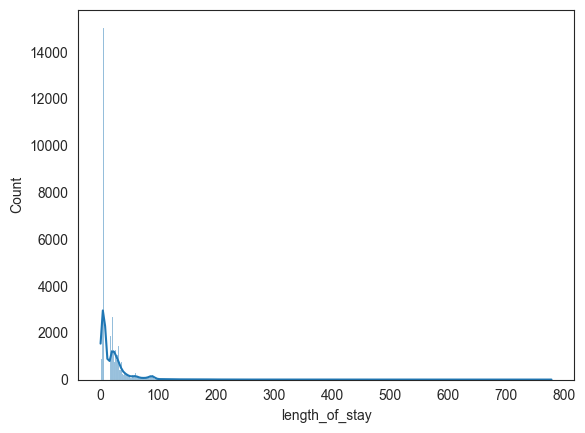

In [21]:
sns.histplot(eda['length_of_stay'], kde=True)
plt.show()

In [22]:
eda[eda['length_of_stay'] == 778]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,planner
10821,1,Internet,RoundTrip,102,778,8,3,DPSMEL,Australia,0,0,0,8.83,1,91-180


In [23]:
# Now check for the outlier
# Outlier Detection
q3 = eda['length_of_stay'].quantile(0.75)
q1 = eda['length_of_stay'].quantile(0.25)

# IQR Range
iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

eda[(eda['length_of_stay'] > upper_bound) | (eda['length_of_stay'] < lower_bound)]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,planner
18,1,Internet,RoundTrip,67,155,8,7,AKLDEL,New Zealand,1,0,0,5.52,0,31-90
21,1,Internet,RoundTrip,21,88,9,3,AKLICN,South Korea,1,0,1,6.62,0,8-30
31,2,Internet,RoundTrip,7,82,4,4,AKLICN,South Korea,1,0,1,6.62,0,0-7
41,1,Internet,RoundTrip,71,90,7,4,AKLICN,South Korea,1,1,1,6.62,0,31-90
43,1,Internet,RoundTrip,9,84,7,3,AKLICN,New Zealand,1,0,0,6.62,0,8-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25580,1,Internet,RoundTrip,129,63,15,5,TRZWUH,Taiwan,1,0,1,5.13,0,91-180
25581,1,Internet,RoundTrip,127,67,8,7,TRZWUH,China,1,0,1,5.13,0,91-180
25582,1,Internet,RoundTrip,127,67,8,7,TRZWUH,China,1,0,1,5.13,0,91-180
25586,1,Internet,RoundTrip,129,63,17,5,TRZWUH,Taiwan,1,0,1,5.13,0,91-180


Around 3,807 data point has found has an outlier. We can simply drop the row, but before that will filter and check number of row where ticket is booked sucessfully even lenght_of_stay is high, because some may have planned for long holiday. 

In [24]:
eda[eda['booking_complete'] == 1][(eda['length_of_stay'] > upper_bound) | (eda['length_of_stay'] < lower_bound)]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,planner
94,1,Internet,RoundTrip,181,87,2,2,AKLKUL,Singapore,1,0,1,8.83,1,91-180
124,1,Internet,RoundTrip,22,180,13,4,AKLKUL,Malaysia,1,0,0,8.83,1,8-30
152,1,Internet,RoundTrip,10,91,23,2,AKLKUL,Singapore,1,0,0,8.83,1,8-30
168,1,Internet,RoundTrip,142,124,9,3,AKLKUL,Malaysia,1,0,0,8.83,1,91-180
258,1,Mobile,RoundTrip,22,82,10,5,AKLKUL,Malaysia,1,1,1,8.83,1,8-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25223,2,Internet,RoundTrip,264,90,9,1,SUBSYD,Australia,1,0,1,8.58,1,181-624
25227,1,Internet,RoundTrip,9,90,4,1,SUBSYD,Indonesia,1,0,0,8.58,1,8-30
25423,1,Internet,RoundTrip,40,119,7,7,SYDTRZ,Australia,1,1,1,8.58,1,31-90
25491,2,Internet,RoundTrip,30,76,10,1,SYDTRZ,Australia,1,1,1,8.58,1,8-30


551 data point look valid for now, and using that information let's remove the row where stay period is high for unecessary.

In [25]:
length_stay_outlier = eda[eda['booking_complete'] == 0][(eda['length_of_stay'] > upper_bound) | (eda['length_of_stay'] < lower_bound)].index.values

In [26]:
eda.drop(index=length_stay_outlier, inplace=True)

As we have checked the detail from British Airways like they allow for 1 year window period of return trip. With that information we can simply remove the column where length of stay is greater than 365 wheter ticket is booked or not booked.

In [27]:
eda.drop(eda[eda['length_of_stay'] >= 365].index, inplace=True)

Check the outlier

<Axes: ylabel='length_of_stay'>

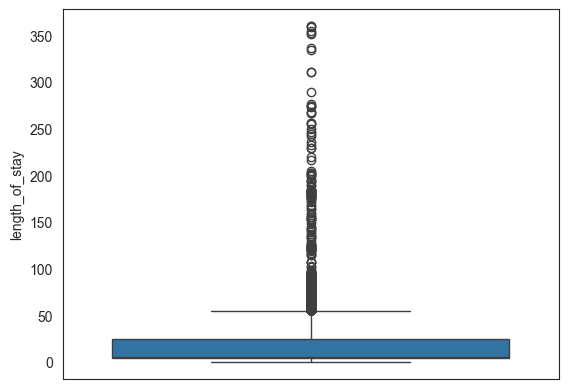

In [28]:
sns.boxplot(eda['length_of_stay'])

Still it shows the outlier. Now we can do one thing like most people book within 90 days prior their fligh boarding here will check is there any one who has not booked the ticket but still showing. If the value will come up, then will remove from the data.

In [29]:
eda[(eda['length_of_stay'] >= 90) & (eda['booking_complete'] == 0)]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,planner


As no value is showing-up which mean the outlier value is real one so will keep the rest of thing like that.

After the initial clean-up, let me create the bucket size to see the lenght-of-stay

In [30]:
bins = [0, 30, 60, 90, 180, 365]
labels = ['0-30 days', '30-60 days', '60-90 days', '90-180 days', '180-365 days']

eda['length_of_stay_bins'] = pd.cut(eda['length_of_stay'], bins=bins, labels=labels, right=False)

In [31]:
length_of_stay_bin = eda[eda['booking_complete'] == 1]['length_of_stay_bins'].value_counts(normalize=True) * 100
length_of_stay_bin

length_of_stay_bins
0-30 days       82.157676
30-60 days       9.650649
60-90 days       5.380806
90-180 days      2.034534
180-365 days     0.776335
Name: proportion, dtype: float64

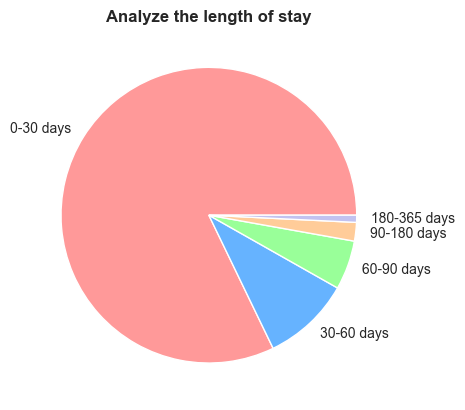

In [32]:
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
plt.pie(length_of_stay_bin, colors=colors, labels=length_of_stay_bin.index)
plt.title("Analyze the length of stay", fontweight="bold")
plt.show()

We concluded the 82% of people stay at destination location less than 30 days.

### **6. Analyze flying hours & flight days**

In [33]:
# Find popular flight durations (flight_duration)
bins = [0, 5, 11, 17, 23] 
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

eda['departure_time']= pd.cut(eda['flight_hour'], bins=bins, labels=labels, right=True)

In [34]:
departure_time = eda[eda['booking_complete'] == 1]['departure_time'].value_counts().reset_index()
departure_time

,departure_time,count
0,Morning,2720
1,Afternoon,2290
2,Night,1928
3,Evening,351


<Axes: xlabel='departure_time', ylabel='count'>

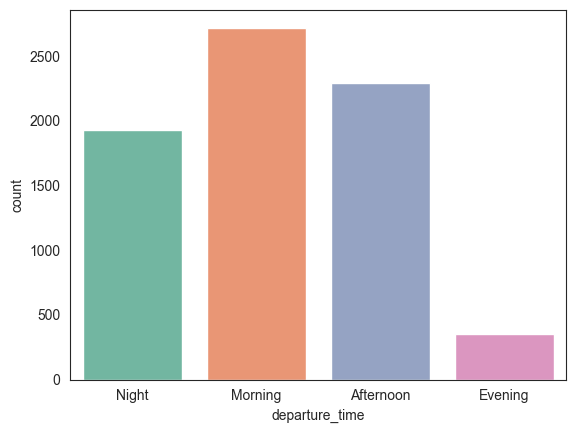

In [35]:
sns.barplot(data=departure_time, x="departure_time", y="count", hue="departure_time", palette="Set2")

### **7. Analyze flight_day**

In [36]:
#preferred flight days flight_day
eda[eda['booking_complete'] == 1]['flight_day'].value_counts().sort_index(ascending=True)

flight_day
1    1201
2    1128
3    1251
4    1121
5     982
6     861
7     927
Name: count, dtype: int64

As per the output we can say as the weekend approaching people flew less compare to business days.

### **8. Analyze which origin country books the most tickets**


In [37]:
# Analyze booking_origin to see which country books more.
eda[eda['booking_complete'] == 1]['booking_origin'].value_counts(normalize=True).sort_values(ascending=False).head(10) * 100

booking_origin
Malaysia       32.980859
Australia      12.019810
China           9.289252
Indonesia       8.218445
Japan           6.398073
Thailand        6.290992
South Korea     6.183911
Singapore       4.002142
Taiwan          2.998260
India           1.753447
Name: proportion, dtype: float64

Most of the BA flight board from Malaysia, Australia, China, and so on. 

In [38]:
eda[eda['booking_complete'] == 0]['booking_origin'].value_counts().head(10)

booking_origin
Australia      15579
Malaysia        4135
South Korea     3880
Japan           3272
China           2625
Taiwan          1716
Indonesia       1664
Thailand        1491
India            987
New Zealand      890
Name: count, dtype: int64

### **9. Analyze people's preference for additional services**

In [39]:
eda[eda['booking_complete'] == 1]['wants_extra_baggage'].value_counts()

wants_extra_baggage
1    5569
0    1902
Name: count, dtype: int64

In [40]:
eda[eda['booking_complete'] == 1]['wants_preferred_seat'].value_counts()

wants_preferred_seat
0    4843
1    2628
Name: count, dtype: int64

In [41]:
eda[eda['booking_complete'] == 1]['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    4046
1    3425
Name: count, dtype: int64

### **10. Analyze preferred flight duration**

In [42]:
bins = [0, 5, 7, 10]
labels = ['Short', 'Medium', 'Long']

eda['flight_duration_category']  = pd.cut(eda['flight_duration'], bins=bins, labels=labels, right=True)

In [43]:
eda[eda['booking_complete'] == 1]['flight_duration_category'].value_counts()

flight_duration_category
Medium    3226
Long      2953
Short     1292
Name: count, dtype: int64

### **11. Analyze sales channel vs. trip type**

In [44]:
# Check if people traveling in groups book through a specific channel
eda_viz  = eda[eda['booking_complete'] == 1].groupby(['trip_type', 'sales_channel']).size().reset_index(name='Count')
eda_viz 

,trip_type,sales_channel,Count
0,CircleTrip,Internet,5
1,OneWay,Internet,18
2,OneWay,Mobile,2
3,RoundTrip,Internet,6840
4,RoundTrip,Mobile,606


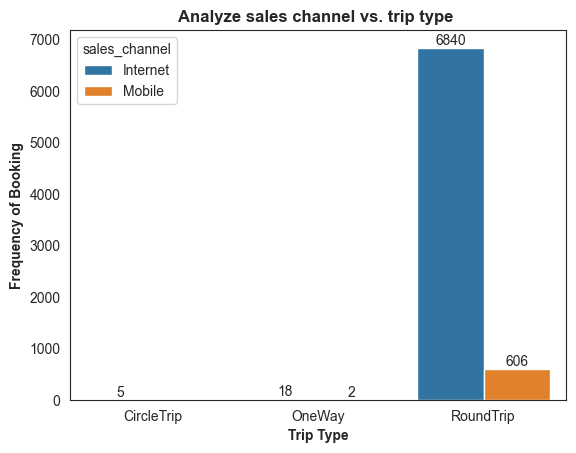

In [45]:
ax = sns.barplot(data=eda_viz, x='trip_type', y='Count', hue='sales_channel')
for i in ax.containers:
    ax.bar_label(i)

plt.title("Analyze sales channel vs. trip type ", fontweight="bold")
plt.xlabel("Trip Type", fontweight="bold")
plt.ylabel("Frequency of Booking", fontweight="bold")
plt.show()

The most of trip was about rountrip, and all booked through internet medium.

### **12. Analyze the relationship between number of passengers vs. sales channel**

In [46]:
# Do round-trips get booked through specific channels
bins = [0, 1, 2, 3, 9]
labels = ['Solo', 'Pair', 'Small Group', 'Lage Group']
eda["passenger_category"]  = pd.cut(eda['num_passengers'], bins=bins, labels=labels, right=True)

In [47]:
relationship_with_sales_channel = eda[eda['booking_complete'] == 1].groupby(['passenger_category', 'sales_channel'], observed=False).size().reset_index(name="count")
relationship_with_sales_channel

,passenger_category,sales_channel,count
0,Solo,Internet,4107
1,Solo,Mobile,342
2,Pair,Internet,1872
3,Pair,Mobile,178
4,Small Group,Internet,445
5,Small Group,Mobile,46
6,Lage Group,Internet,439
7,Lage Group,Mobile,42


In [48]:
relationship_with_sales_channel["count_percent"] = relationship_with_sales_channel["count"] / relationship_with_sales_channel["count"].sum() * 100
relationship_with_sales_channel

,passenger_category,sales_channel,count,count_percent
0,Solo,Internet,4107,54.972561
1,Solo,Mobile,342,4.577700
2,Pair,Internet,1872,25.056887
3,Pair,Mobile,178,2.382546
4,Small Group,Internet,445,5.956365
5,Small Group,Mobile,46,0.615714
6,Lage Group,Internet,439,5.876054
7,Lage Group,Mobile,42,0.562174


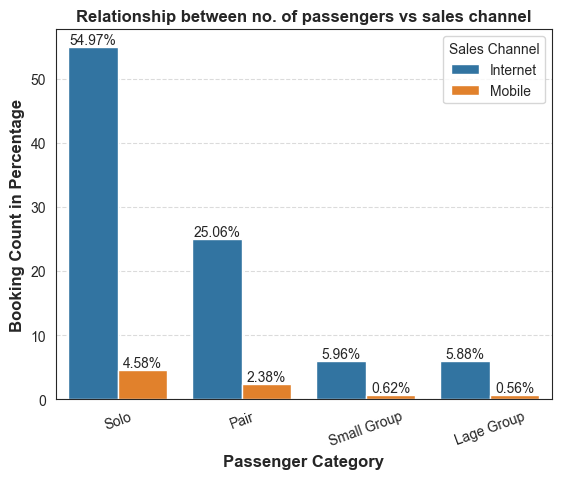

In [49]:
ax = sns.barplot(relationship_with_sales_channel, x='passenger_category', y='count_percent', hue='sales_channel')
for i in ax.containers:
    ax.bar_label(i, fmt="%.2f%%")

plt.title("Relationship between no. of passengers vs sales channel", fontweight="bold")
plt.xlabel("Passenger Category", fontweight="bold", fontsize=12)
plt.ylabel("Booking Count in Percentage", fontweight="bold", fontsize=12)
plt.legend(title="Sales Channel")

plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **13. Analyze purchase lead vs. trip type**

In [ ]:
# Do long trips get booked much earlier than short trips
purchase_lead_with_trip_type = eda[eda['booking_complete'] == 1].groupby(['planner', 'trip_type'], observed=False).size().reset_index(name="count")
purchase_lead_with_trip_type

In [ ]:
purchase_lead_with_trip_type['percentage'] = purchase_lead_with_trip_type['count'] / purchase_lead_with_trip_type['count'].sum() * 100 
purchase_lead_with_trip_type.sort_values(by='percentage')

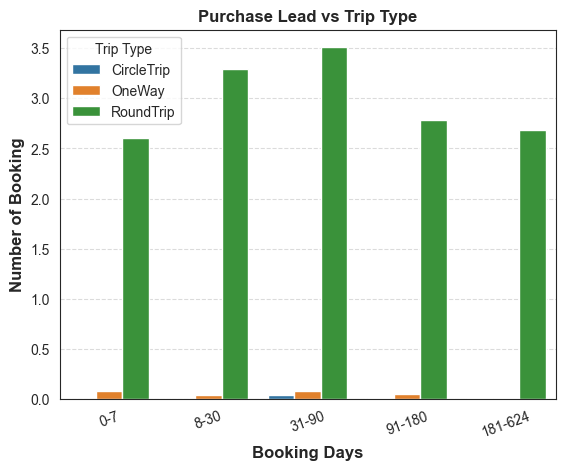

In [52]:
sns.barplot(data=purchase_lead_with_trip_type, x='planner', y=np.log1p(purchase_lead_with_trip_type['percentage']), hue='trip_type')

plt.title("Purchase Lead vs Trip Type", fontweight="bold")
plt.xlabel("Booking Days", fontweight="bold", fontsize=12)
plt.ylabel("Number of Booking", fontweight="bold", fontsize=12)
plt.legend(title="Trip Type")

plt.xticks(rotation=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **14. Analyze purchase lead vs. length of stay**

In [53]:
# Do early planners stay longer
planner_with_stay = eda[eda['booking_complete'] == 1].groupby(['planner', 'length_of_stay_bins'], observed=False).size().reset_index(name='count')
planner_with_stay['percentage'] = planner_with_stay.groupby('planner')['count'].transform(lambda x: (x / x.sum()) * 100)

In [ ]:
planner_with_stay[['planner', 'length_of_stay_bins', 'percentage']]

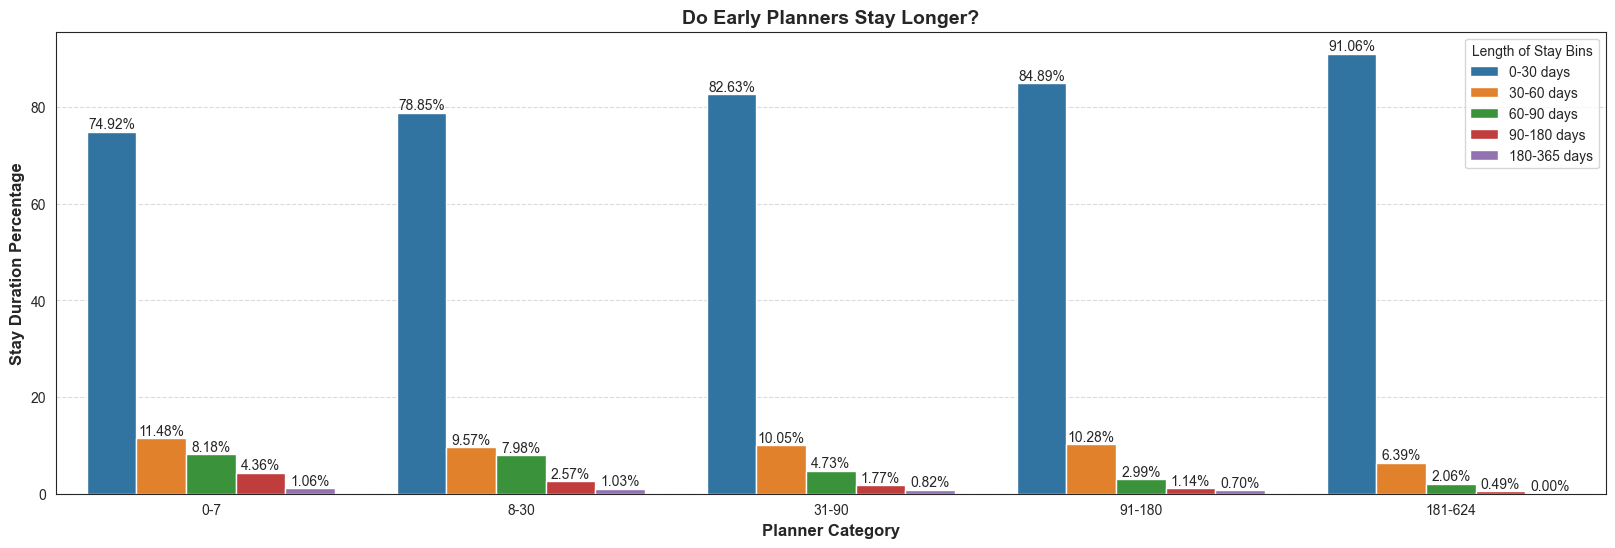

In [56]:
plt.figure(figsize=(20,6))
ax = sns.barplot(data=planner_with_stay, x='planner', y='percentage', hue='length_of_stay_bins')

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f%%")

plt.title("Do Early Planners Stay Longer?", fontweight="bold", fontsize=14)
plt.xlabel("Planner Category", fontweight="bold", fontsize=12)
plt.ylabel("Stay Duration Percentage", fontweight="bold", fontsize=12)
plt.legend(title="Length of Stay Bins")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the analysis, we observe that travelers who plan their trips stays mostly for 0-30 days.

### **15. Analyze purchase lead vs. flight hour**

In [57]:
planner_flight_pref = eda[eda['booking_complete'] == 1].groupby(['planner', 'departure_time'], observed=False).size().reset_index(name='count')
planner_flight_pref['rank'] = planner_flight_pref.groupby('planner', observed=False)['count'].rank(method="dense", ascending=False)

In [58]:
planner_flight_pref[planner_flight_pref['rank'] == 1.0]

,planner,departure_time,count,rank
1,0-7,Morning,368,1.0
5,8-30,Morning,735,1.0
9,31-90,Morning,871,1.0
13,91-180,Morning,414,1.0
18,181-624,Afternoon,345,1.0


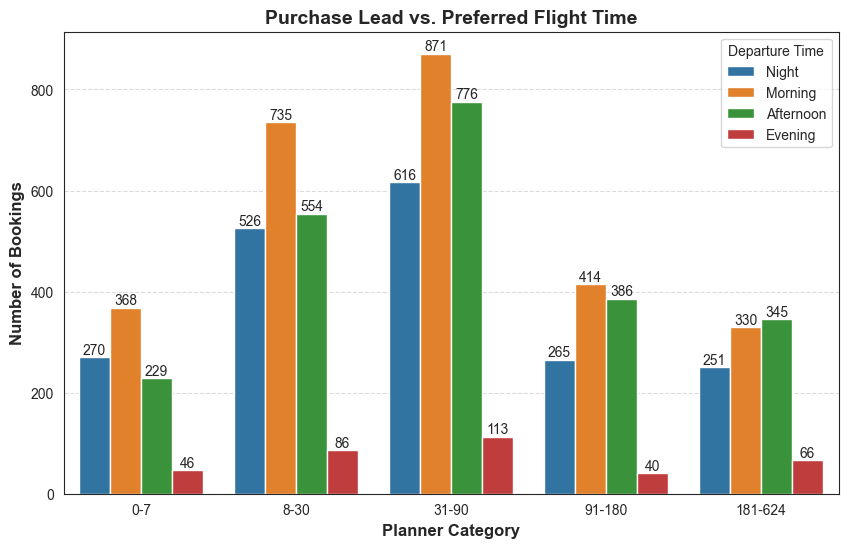

In [59]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=planner_flight_pref, x='planner', y='count', hue='departure_time')

for container in ax.containers:
    ax.bar_label(container, fmt="%.0f")

plt.title("Purchase Lead vs. Preferred Flight Time", fontweight="bold", fontsize=14)
plt.xlabel("Planner Category", fontweight="bold", fontsize=12)
plt.ylabel("Number of Bookings", fontweight="bold", fontsize=12)
plt.legend(title="Departure Time")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In every category passenger prefer morning flight, but in the long planning some has preferred afternoon over morning.

### **16. Analyze wants extra baggage vs. booking complete**

In [60]:
baggage_vs_booking  = eda.groupby('wants_extra_baggage')['booking_complete'].value_counts(normalize=True).unstack() * 100
baggage_vs_booking.columns = ['Not completed %', 'Completed %']
baggage_vs_booking

,Not completed %,Completed %
wants_extra_baggage,,
0,88.171642,11.828358
1,81.834491,18.165509


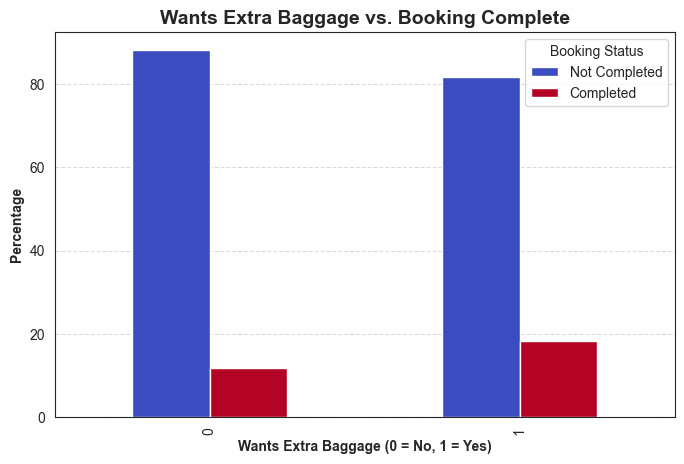

In [61]:
baggage_vs_booking.plot(kind='bar', figsize=(8,5), colormap='coolwarm')

plt.title("Wants Extra Baggage vs. Booking Complete", fontsize=14, fontweight="bold")
plt.xlabel("Wants Extra Baggage (0 = No, 1 = Yes)", fontweight="bold")
plt.ylabel("Percentage", fontweight="bold")

plt.legend(title="Booking Status", labels=["Not Completed", "Completed"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **17. Analyze booking origin vs. trip type**

In [62]:
origin_vs_trip  = (
    eda[eda['booking_complete'] == 1]
    .groupby(['booking_origin', 'trip_type'])
    .size()
    .sort_values(ascending=False)
    .head(10)
    .reset_index(name='count'))

origin_vs_trip['percentage'] = (
    origin_vs_trip['count'] / origin_vs_trip['count'].sum() * 100
)

origin_vs_trip

,booking_origin,trip_type,count,percentage
0,Malaysia,RoundTrip,2458,36.620977
1,Australia,RoundTrip,891,13.274732
2,China,RoundTrip,693,10.324791
3,Indonesia,RoundTrip,610,9.088200
4,Japan,RoundTrip,476,7.091776
5,Thailand,RoundTrip,468,6.972586
6,South Korea,RoundTrip,462,6.883194
7,Singapore,RoundTrip,299,4.454708
8,Taiwan,RoundTrip,224,3.337306
9,India,RoundTrip,131,1.951728


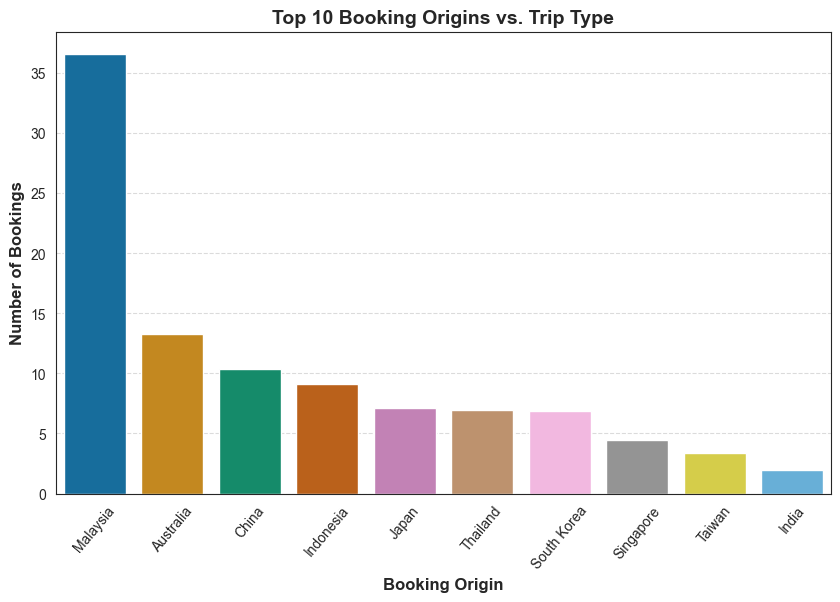

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(origin_vs_trip, x='booking_origin', y='percentage', palette="colorblind", hue='booking_origin')
plt.title("Top 10 Booking Origins vs. Trip Type", fontweight="bold", fontsize=14)
plt.xlabel("Booking Origin", fontweight="bold", fontsize=12)
plt.ylabel("Number of Bookings", fontweight="bold", fontsize=12)
plt.xticks(rotation=50)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 4. Data Cleaning & Preprocessing 

During the EDA phase, we identified anomalies in the length_of_day column. A deeper analysis revealed that:

- 3,250 entries had not completed a booking (booking_complete == 0).
- 550 confirmed bookings (booking_complete == 1) had unrealistically high values for length_of_day.

To address this, we applied the following data cleaning strategy:

1. Removed rows where booking_complete == 0, as these do not contribute to meaningful insights.
2. Filtered out extreme values for confirmed bookings, considering that British Airways does not allow round-trip ticket bookings beyond one year in advance. Thus, any length_of_day exceeding 365 days was removed.

In [87]:
# Outlier Detection
q3 = df['length_of_stay'].quantile(0.75)
q1 = df['length_of_stay'].quantile(0.25)

# IQR Range
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df[(df['length_of_stay'] > upper_bound) | (df['length_of_stay'] < lower_bound)]

length_stay_outlier = df[df['booking_complete'] == 0][(df['length_of_stay'] > upper_bound) | (df['length_of_stay'] < lower_bound)].index.values
df.drop(index=length_stay_outlier, inplace=True)

df.drop(df[df['length_of_stay'] >= 365].index, inplace=True)

In [25]:
df.shape

(46737, 14)

## 5. Feature Engineering

To see the base result of model, first I'll try to predict without binning to see how it's work which help me to see things from both the end.

First let's do some Encoding categorical variables, feature transformation, scaling / standardization and then feature selection.

#### 0. Feature Selection

In [88]:
bins = [0, 8, 31, 91, 181, 625, 900]
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

df['planner'] = pd.cut(df['purchase_lead'], bins=bins, labels=labels,
       include_lowest=True)

# length_bucket
bins = [0, 30, 60, 90, 180, 365]
labels = ['0-30 days', '30-60 days', '60-90 days', '90-180 days', '180-365 days']

df['length_of_stay_bins'] = pd.cut(df['length_of_stay'], bins=bins, labels=labels, right=False)


# Find popular flight durations (flight_duration)
bins = [0, 5, 11, 17, 23] 
labels = ['Night', 'Morning', 'Afternoon', 'Evening']

df['departure_time']= pd.cut(df['flight_hour'], bins=bins, labels=labels, include_lowest=True)

# Flight Duration
bins = [0, 5, 7, 10]
labels = ['Short', 'Medium', 'Long']

df['flight_duration_category']  = pd.cut(df['flight_duration'], bins=bins, labels=labels, right=True)

# Do round-trips get booked through specific channels
bins = [0, 1, 2, 3, 9]
labels = ['Solo', 'Pair', 'Small Group', 'Large Group']
df["passenger_category"]  = pd.cut(df['num_passengers'], bins=bins, labels=labels, right=True)

In [89]:
col_remove = ['purchase_lead', 'length_of_stay', 'flight_hour', 'num_passengers', 'flight_duration']
df.drop(columns=col_remove, inplace=True)

In [110]:
df['planner'] = df['planner'].astype('float')
df['length_of_stay_bins'] = df['length_of_stay_bins'].astype('float')
df['departure_time'] = df['departure_time'].astype('float')
df['flight_duration_category'] = df['flight_duration_category'].astype('float')
df['passenger_category'] = df['passenger_category'].astype('float')

In [ ]:
df["purchase_lead_length_ratio"] = df["planner"] / (df["length_of_stay_bins"] + 1)  # +1 to avoid division by zero
df["route_origin_interaction"] = df["route_code_freq"] * df["book_origin_freq"]

#### 1. Encoding

In [91]:
# Label Encoding to "sales_channel" column
df['sales_channel'].unique()
mapping = {
    "Internet": 1,
    "Mobile": 2
}

df['sales_channel'] = df['sales_channel'].map(mapping)
df['sales_channel'].unique()

array([1, 2], dtype=int64)

In [92]:
# Label Encoding to "trip_type" column
df['trip_type'].unique()
mapping = {
    "OneWay": 1,
    "RoundTrip": 2,
    "CircleTrip": 3
}

df['trip_type'] = df['trip_type'].map(mapping)
df['trip_type'].unique()

array([2, 3, 1], dtype=int64)

In [93]:
# Label Encoding to "flight_day" column
df["flight_day"].unique()

mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [94]:
# Planning Date Convert to Label Encoding
df["planner"].unique()

mapping = {
    "0-7": 1,
    "8-30": 2,
    "31-90": 3,
    "91-180": 4,
    "181-624": 5,
    "625-899": 6
}

df['planner'] = df['planner'].map(mapping)
df['planner'].unique()

[5, 4, 3, 1, 2, 6]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [95]:
# length_of_stay_bins Convert to Label Encoding
df["length_of_stay_bins"].unique()

mapping = {
    "0-30 days": 1,
    "30-60 days": 2,
    "60-90 days": 3,
    "180-365 days": 4,
    "90-180 days": 5
}

df['length_of_stay_bins'] = df['length_of_stay_bins'].map(mapping)
df['length_of_stay_bins'].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 5 < 4]

In [96]:
# departure_time Convert to Label Encoding
df["departure_time"].unique()

mapping = {
    "Morning": 1,
    "Afternoon": 2,
    "Evening": 3,
    "Night": 4
}

df['departure_time'] = df['departure_time'].map(mapping)
df['departure_time'].unique()

[1, 4, 2, 3]
Categories (4, int64): [4 < 1 < 2 < 3]

In [97]:
# flight_duration_category Convert to Label Encoding
df["flight_duration_category"].unique()

mapping = {
    "Short": 1,
    "Medium": 2,
    "Long": 3
}

df['flight_duration_category'] = df['flight_duration_category'].map(mapping)
df['flight_duration_category'].unique()

[2, 3, 1]
Categories (3, int64): [1 < 2 < 3]

In [98]:
# passenger_category Convert to Label Encoding
df["passenger_category"].unique()

mapping = {
    "Solo": 1,
    "Pair": 2,
    "Small Group": 3,
    "Large Group": 4
}

df['passenger_category'] = df['passenger_category'].map(mapping)
df['passenger_category'].unique()

[2, 1, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

In [99]:
# Frequency Encoding because there are 797 unique value 
# because of tha label, one-hot encoding will not make sense here.
route_counts = df['route'].value_counts()
df['route_code_freq'] = df['route'].map(route_counts)

df.drop(columns='route', axis=1, inplace=True)

In [100]:
# Frequency Encoding to "booking_origin" column
booking_origin_map = df['booking_origin'].value_counts()
df['book_origin_freq'] = df['booking_origin'].map(booking_origin_map)

df.drop(columns='booking_origin', axis=1, inplace=True)

#### 2. Transformation

As we have change the categorical value to numerical, but some of the features are skwewed so to proceed ahead first let's do log transformation on it.

In [48]:
skeweed_data = ['length_of_stay_bins', 'route_code_freq', 'book_origin_freq']

pt = PowerTransformer(method='yeo-johnson')
df[skeweed_data] = pt.fit_transform(df[skeweed_data])

print(df[skeweed_data].skew())

length_of_stay_bins    1.740318
route_code_freq       -0.005312
book_origin_freq      -0.158961
dtype: float64


#### 3. Scaling

In [101]:
col = ['route_code_freq', 'book_origin_freq']

scaler = StandardScaler()
df[col] = scaler.fit_transform(df[col])

## 6. Handling Imbalanced Data (SMOTE)

<Axes: xlabel='purchase_lead', ylabel='length_of_stay'>

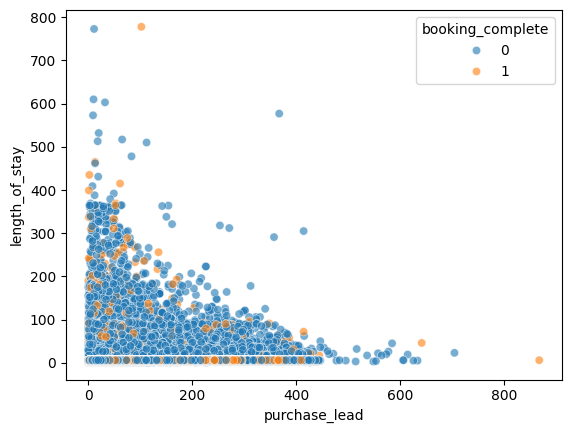

In [ ]:
sns.scatterplot(data=eda, x='purchase_lead', y='length_of_stay', hue='booking_complete', alpha=0.6)

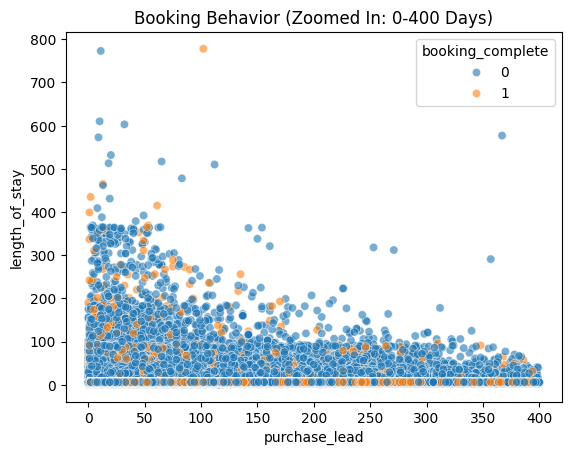

In [ ]:
sns.scatterplot(data=eda[eda['purchase_lead'] <= 400], x='purchase_lead', y='length_of_stay', hue='booking_complete', alpha=0.6)
plt.title("Booking Behavior (Zoomed In: 0-400 Days)")
plt.show()

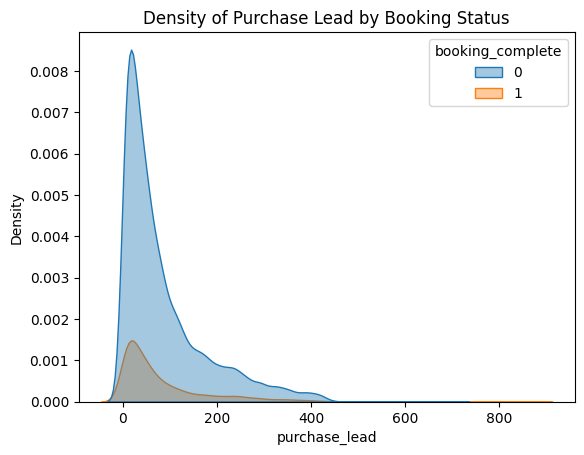

In [ ]:
sns.kdeplot(data=eda, x="purchase_lead", hue="booking_complete", fill=True, alpha=0.4)
plt.title("Density of Purchase Lead by Booking Status")
plt.show()


In [ ]:
eda['booking_complete'].value_counts(normalize=True) * 100

booking_complete
0    85.044
1    14.956
Name: proportion, dtype: float64

In [50]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(class_weight="balanced", classes=[0, 1], y=df['booking_complete'])
print("Class Weights:", class_weights)

Class Weights: [0.59513319 3.12789453]


In [111]:
X = df.drop(columns=['booking_complete'])
y = df['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14, stratify=y)

In [112]:
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", Counter(y_train))  
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 31412, 1: 5977})
After SMOTE: Counter({0: 31412, 1: 31412})


## 7. Model Development

### Linear Regression

In [103]:
model = LogisticRegression(class_weight={0: 1, 1: 5.0}, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 5.0}, random_state=42)

Model performance is still not good as expected let do SMOTE

### SMOTE

In [113]:
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train model on the resampled data
log_reg_smote = LogisticRegression()
log_reg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression()

### RandomForestClassifier

In [117]:
rf = RandomForestClassifier(n_estimators=500, 
                            class_weight={0: 1, 1: 5.0},
                            max_depth=20,
                            min_samples_leaf=5,
                            min_samples_split=2,
                            random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 5.0}, max_depth=20,
                       min_samples_leaf=5, n_estimators=500, random_state=42)

## 8. Model Evaluation (Metrics & Validation)

In [104]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy: 0.6274069319640565
              precision    recall  f1-score   support

           0       0.91      0.62      0.74      7854
           1       0.25      0.67      0.37      1494

    accuracy                           0.63      9348
   macro avg       0.58      0.65      0.55      9348
weighted avg       0.80      0.63      0.68      9348



array([[4862, 2992],
       [ 491, 1003]], dtype=int64)

As the accuracy score of 0.84 is for 0, and 1 is 0.50, which mean model is priotizing the non-booked ticket over booked one. 

To fix issue we can add class_weight in model parameter, or will try to balance out using SMOTE

After using the balanced model performance got dropped but the model is able to detect, but the accuracy score is dropped and also it's false classifying

In [114]:
# SMOTE
y_pred_smote = log_reg_smote.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))
confusion_matrix(y_test, y_pred_smote)

Accuracy: 0.5853658536585366
              precision    recall  f1-score   support

           0       0.91      0.56      0.69      7854
           1       0.24      0.71      0.35      1494

    accuracy                           0.59      9348
   macro avg       0.57      0.64      0.52      9348
weighted avg       0.80      0.59      0.64      9348



array([[4406, 3448],
       [ 428, 1066]], dtype=int64)

RandomForestClassifier model accuracy check

In [116]:
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy: 0.8433889602053916
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      7854
           1       0.53      0.18      0.27      1494

    accuracy                           0.84      9348
   macro avg       0.70      0.57      0.59      9348
weighted avg       0.81      0.84      0.81      9348



array([[7620,  234],
       [1230,  264]], dtype=int64)

In [107]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
auc_score = auc(recall, precision)
print(f"AUC-PR: {auc_score}")

AUC-PR: 0.4891261033090814


## 9. Hyperparameter Tuning (Optimization)

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 500],  # Number of trees
    'max_depth': [10, 20, 30],        # Tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples per split
    'min_samples_leaf': [1, 3, 5]     # Minimum samples per leaf
}

rf = RandomForestClassifier(class_weight="balanced", random_state=42)

grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="f1")
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}


## 10. Final Insights

Accuracy: 78.1%
The Random Forest model achieves an accuracy of 78.1%, which suggests a reasonably good overall performance. However, there’s still room for improvement, especially with the recall of the positive class.

Precision for Class 0 (Negative Class): 91%
The model is highly accurate in predicting the negative class (class 0), with 91% precision. This means that 91% of the instances predicted as class 0 are correct.

Recall for Class 1 (Positive Class): 55%
The recall for the positive class (class 1) is 55%, meaning that the model identifies 55% of all actual positive cases. There’s room to improve this, as 45% of the actual positive cases are missed (false negatives).

F1-Score: 0.79
The F1-score of 0.79 reflects a reasonable balance between precision and recall. This suggests that while the model is performing well for the negative class, the recall for the positive class needs improvement.

**Confusion Matrix:**

- True Positives (TP): 826
- True Negatives (TN): 6448
- False Positives (FP): 1406
- False Negatives (FN): 66

**Summary**:  
The Random Forest model achieved an accuracy of 78.1%, with a precision of 91% for class 0. 

However, recall for class 1 (the positive class) is only 55%, indicating that the model misses a significant portion of the positive instances. To improve performance, I plan to address the class imbalance using SMOTE or undersampling, experiment with threshold tuning to improve recall, and conduct hyperparameter tuning for better model optimization.